In [1]:
import pandas as pd

df = pd.read_csv('Cardiovascular_Disease_dataset.csv')
df.drop('id',axis=1, inplace=True)

In [2]:
df.head()

,Age,Gender,Height,Weight,Systolic blood pressure,Diastolic blood pressure,Cholesterol,Glucose,Smoke,Alcohol intake,Physical activity,Presence or absence of cardiovascular disease
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [3]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
x_axis = []
y_inertia = []
y_silhouette_score = []
for k in range(2, 31):
    x_axis.append(k)
    kmeans = KMeans(n_clusters=k)
    y_pred = kmeans.fit_predict(df)
    silhouette = silhouette_score(df, kmeans.labels_)
    print(k, kmeans.inertia_, silhouette)
    y_inertia.append(kmeans.inertia_)
    y_silhouette_score.append(silhouette)

2 130811617610.75027 0.5902395696644028
3 59022995093.05791 0.5789218462556541
4 34156517160.81163 0.5765796978221972
5 24262134604.52065 0.5621403630875819
6 17025301755.451263 0.5799880340072596
7 13553764789.67025 0.569244249194569
8 11659982417.711693 0.569439010319608
9 9869587934.896833 0.6142733358503905
10 8477576553.559427 0.6356243004184231
11 6961437028.265056 0.6235720711245178
12 5420023115.889703 0.6246660832202631
13 4204961547.112619 0.6598891891795481
14 3220322644.428322 0.6862003919881353
15 2420199486.307928 0.7077398792799232
16 2248571408.088125 0.7125568163940288
17 2155459342.7493105 0.6834409803313249
18 2007327467.3018017 0.688378113998002
19 1916785318.414852 0.6678630841135335
20 1811543437.5788367 0.6699942854323567
21 1759796416.4911797 0.6205344412518644
22 1628603499.5992033 0.635366931930495
23 1564569749.4681404 0.613592768204031
24 1493841421.181451 0.5912536529195801
25 1411770942.9893975 0.6290080943538883
26 1352086848.234006 0.5995088554609057
27 

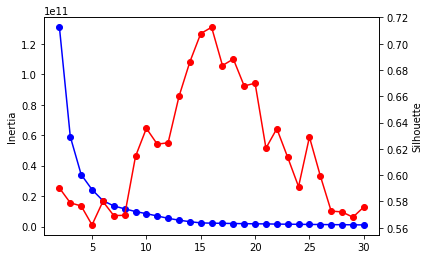

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()
ax1.plot(x_axis, y_inertia, marker='o', color='blue')
ax1.set_ylabel('Inertia')
ax2 = ax1.twinx()
ax2.plot(x_axis, y_silhouette_score, marker='o', color='red')
ax2.set_ylabel('Silhouette')
plt.show()

In [5]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=17)
y_pred = kmeans.fit_predict(df)

In [6]:
add_combine = []
keys = df.keys().values

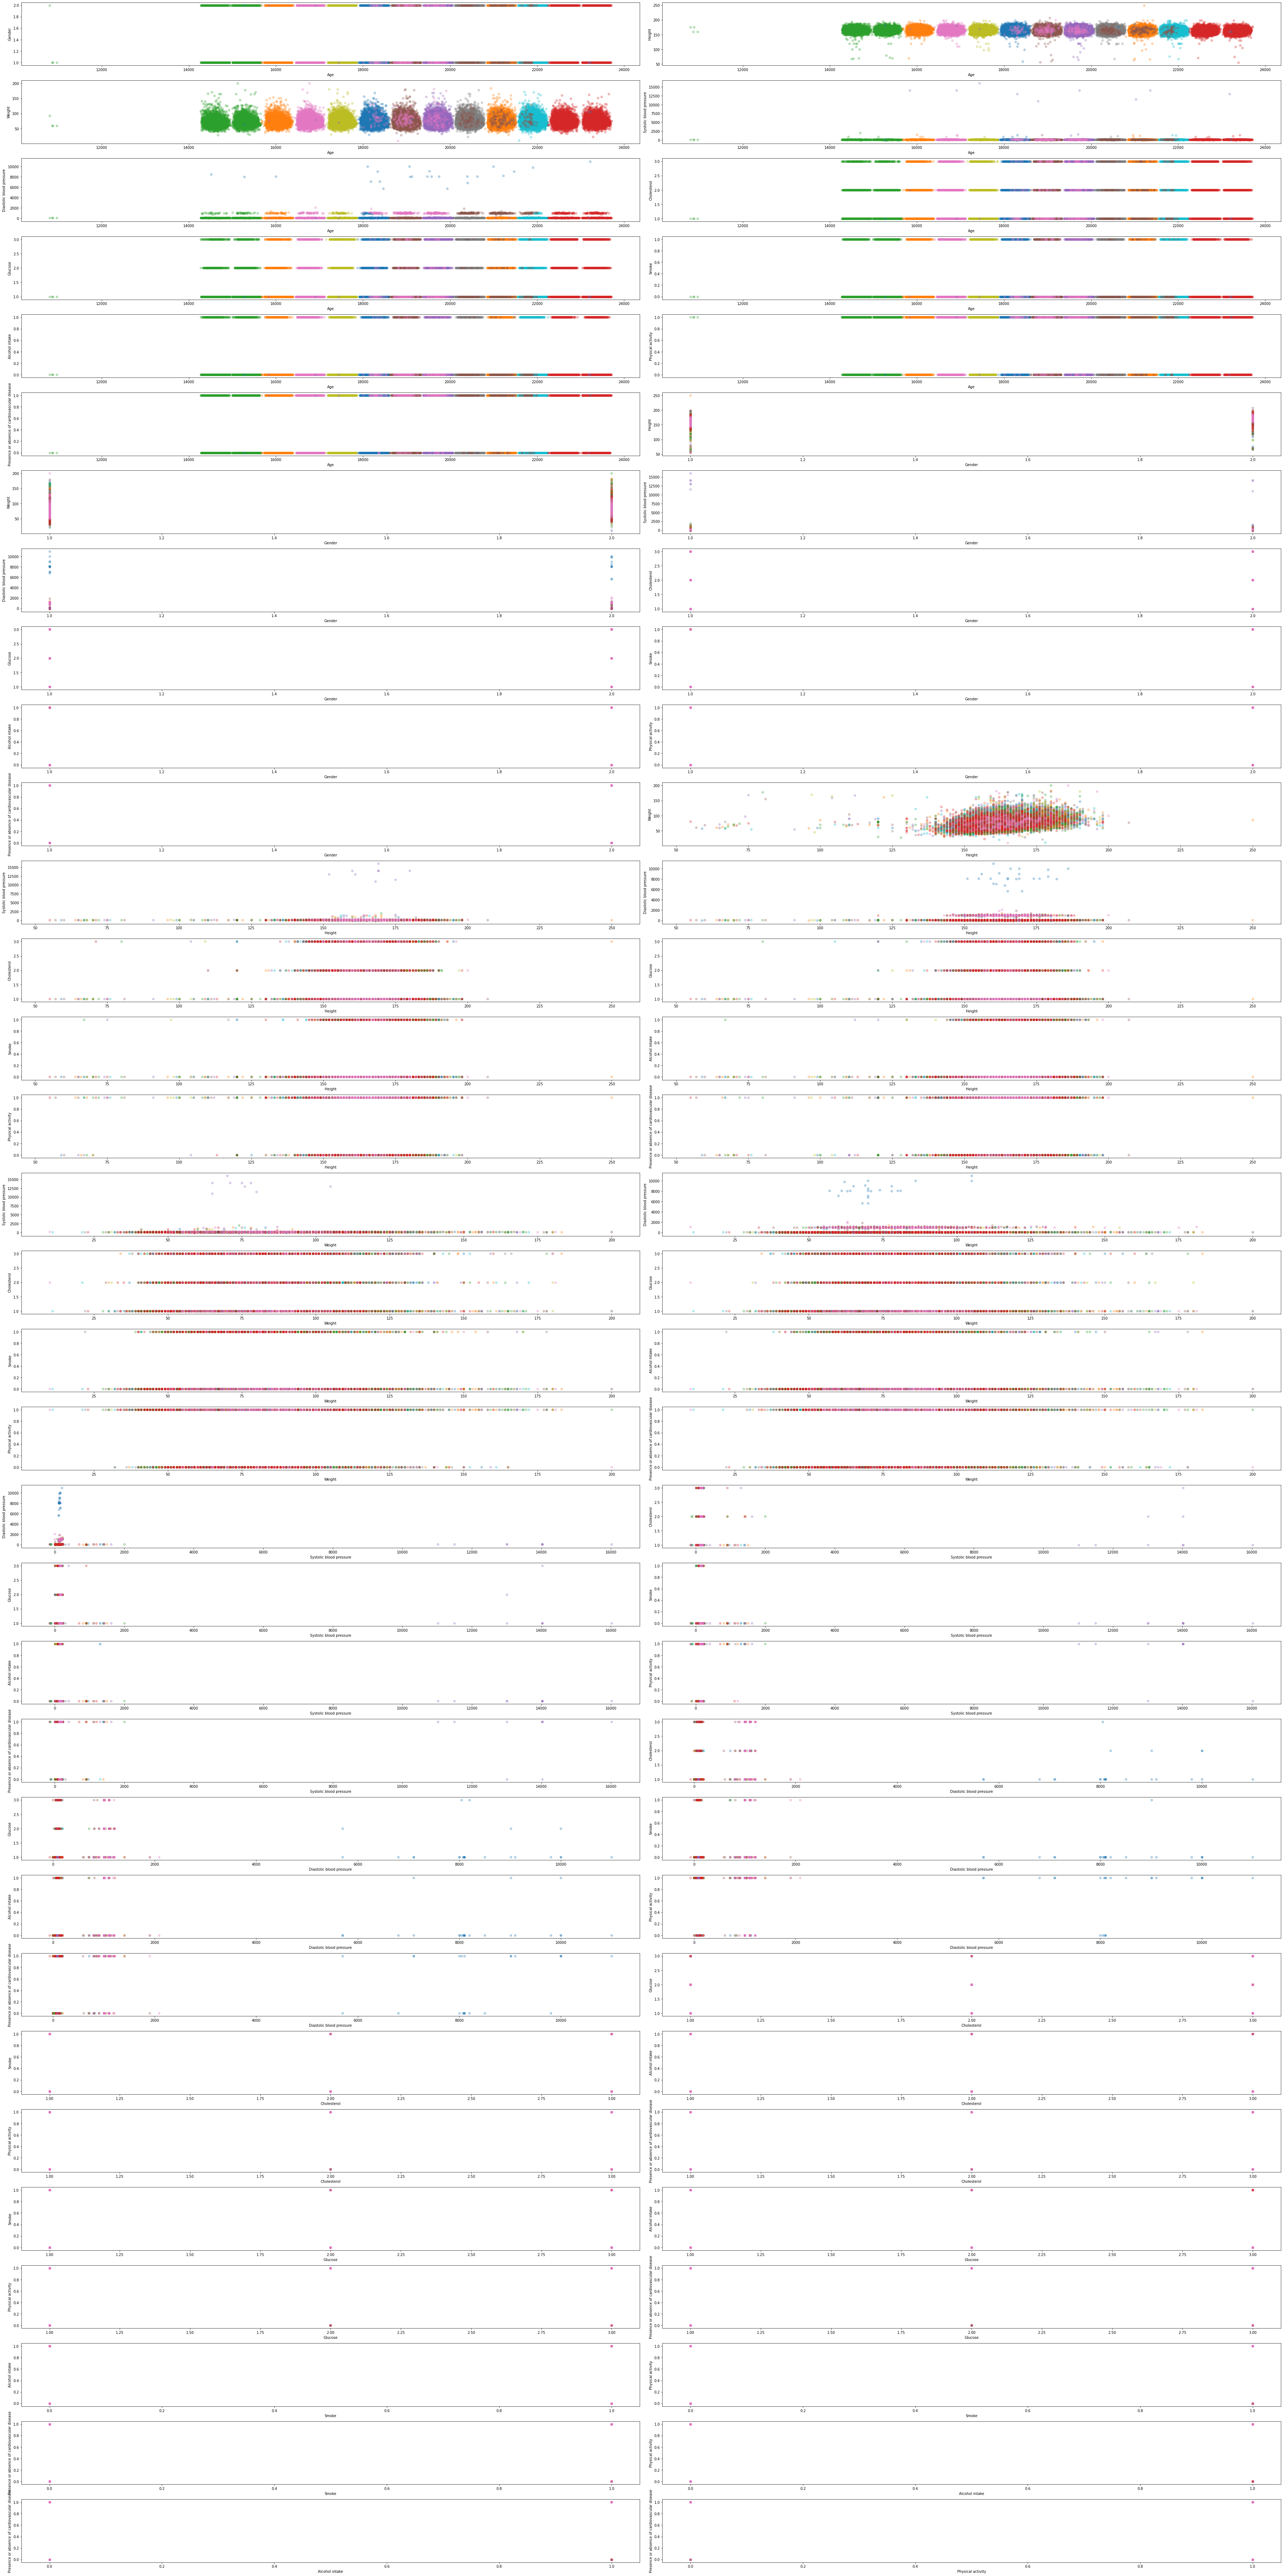

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

total = len(keys)*(len(keys)-1)
col = 2
row = int(total/2+0.5)
idx = 1

fig = plt.figure(figsize=(50,200))
for x_value_key in keys:
    for y_value_key in keys:
        if x_value_key == y_value_key:
            continue
        elif (x_value_key,y_value_key) in add_combine or (y_value_key,x_value_key) in add_combine:
            continue
        
        ax = fig.add_subplot(row,col,idx)
        for k in range(17):
            ax.scatter(df[x_value_key][y_pred==k], df[y_value_key][y_pred==k], alpha=0.3)
        ax.set_xlabel(x_value_key)
        ax.set_ylabel(y_value_key)
        add_combine.append((x_value_key,y_value_key))
        add_combine.append((y_value_key,x_value_key))
        idx += 1
plt.tight_layout()
plt.show()

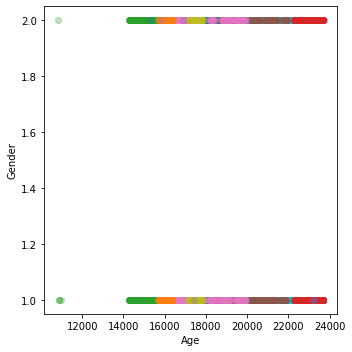

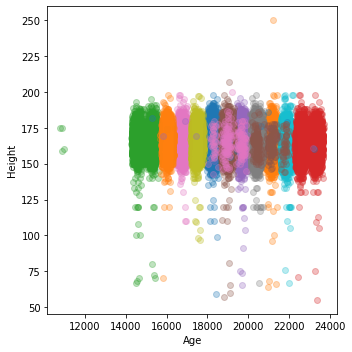

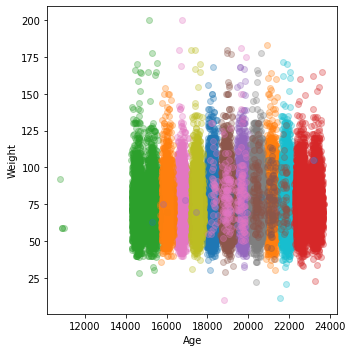

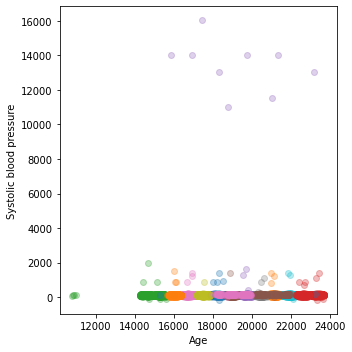

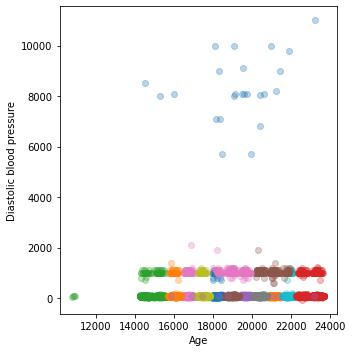

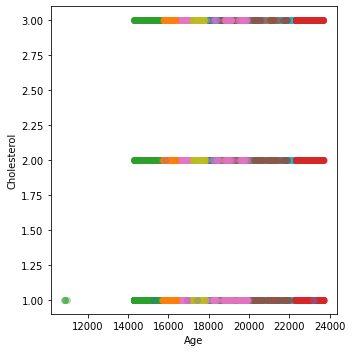

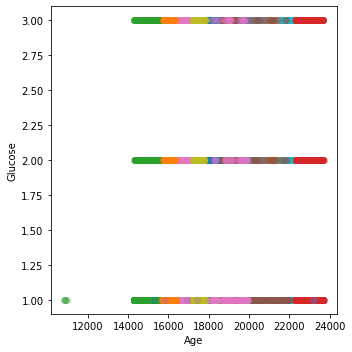

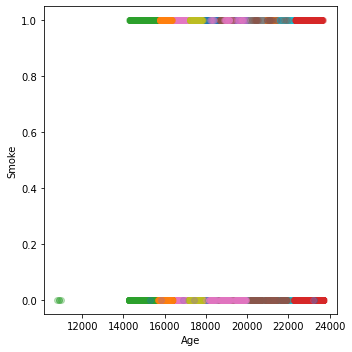

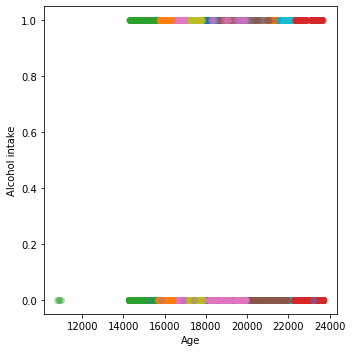

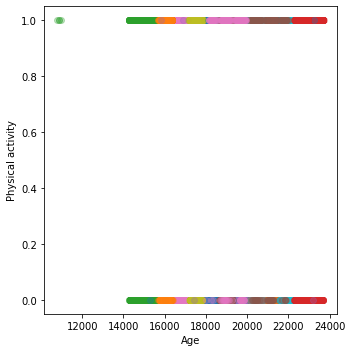

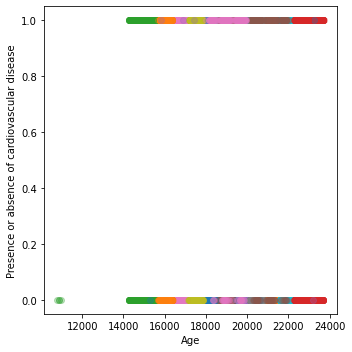

In [8]:
%matplotlib inline

keys = df.keys().drop('Age').values
import matplotlib.pyplot as plt
for y_value_key in keys:
    x_value_key = 'Age'
    plt.figure(figsize=(5,5))
    for k in range(17):
        plt.scatter(df[x_value_key][y_pred==k], df[y_value_key][y_pred==k], alpha=0.3)
    plt.xlabel(x_value_key)
    plt.ylabel(y_value_key)
    plt.tight_layout()
    plt.show()

In [9]:
import numpy as np
feature = df[df.keys().drop(['Age','Presence or absence of cardiovascular disease'])]
kmeans = KMeans(n_clusters=14)
target = kmeans.fit_predict(feature)

In [10]:
target = np.array(target).reshape(-1,1)

In [11]:
np.unique(target)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13],
      dtype=int32)

In [12]:
from sklearn.model_selection import train_test_split
import numpy as np

train_feature, test_feature, train_target, test_target = train_test_split(feature,target,random_state=42)

In [13]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_jobs=-1, random_state=42)
clf.fit(train_feature,train_target)

/tmp/ipykernel_58381/2257175161.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(train_feature,train_target)


RandomForestClassifier(n_jobs=-1, random_state=42)

In [14]:
y_pred = clf.predict(test_feature)

In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

print("Accuracy :",accuracy_score(test_target, y_pred))
print(confusion_matrix(test_target, y_pred,labels=[13,12,11,10,9,8,7,6,5,4,3,2,1,0]))

Accuracy : 0.9910857142857142
[[3701   15    0    0    3    0    0    0    0    8    0    0    0   17]
 [  11 2335    0    0    0    0    0    0    0    1    0    0    0    9]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0]
 [   7    0    0    0 1763    0    0    0    0   33    0    0    0    0]
 [   0    0    0    0    0    0    0    0    1    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    2    0    0    0    1    2    0    0    0    0]
 [   5    0    0    0   12    0    0    0    0 3115    0    0    0    6]
 [   0    0    0    0    0    0    0    0    0    0  240    0    0    2]
 [   0    0    0    0    1    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    3    0    0    0]
 [   8    4    0    0